In [1]:
from __future__ import print_function, division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import text # WER calulation module from DS repo, it uses Lavenstien distance
import wer

%matplotlib inline

In [2]:
with open("short_videos/yw8bpB5L8xo/output_df.b", "rb") as f:
    vdf = pickle.load(f)


In [4]:
# Find the shape
print("vdf: Number of audio segments:{}".format(vdf.shape[0]))


vdf: Number of audio segments:36


In [5]:
# For video 1
wer_v = []
for val in vdf.iterrows():
    ref = val[1]["Reference"]
    ds_hyp = val[1]["Deepspeech hypothesis"]
    la_hyp = val[1]["Livai hypothesis"]
    if not ref:
        # Because text.wer throws ZeroDivisionError if ref is null
        wer_v.append([1.0, 1.0])
        continue
    wer_v.append([text.wer(ref, ds_hyp), text.wer(ref, la_hyp)])

In [6]:
# Push the wer to data frame for easier calculations
werds_df = pd.DataFrame(wer_v, columns=["WER for DS", "WER for LA"])


In [7]:
#   Remove all the values whose WER > 1 
werds_df = werds_df[werds_df["WER for DS"] <= 1]
werds_df = werds_df[werds_df["WER for LA"] <= 1]

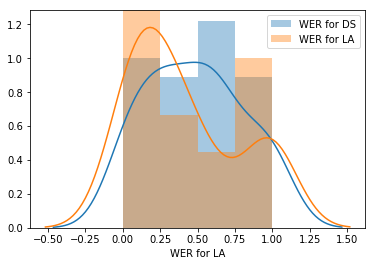

In [8]:
# Plotting the graph for v1
sns.distplot(werds_df["WER for DS"], label="WER for DS")
sns.distplot(werds_df["WER for LA"], label="WER for LA")
plt.legend()
plt.show()

### Lower WER is better

In [9]:
# Look at these stats
werds_df.describe()

,WER for DS,WER for LA
count,36.000000,36.000000
mean,0.480502,0.408470
std,0.321410,0.358333
min,0.000000,0.000000
25%,0.243056,0.145833
50%,0.500000,0.285714
75%,0.671053,0.596591
max,1.000000,1.000000


### Average of WER

In [10]:
print("WER average for video 1: ", werds_df.mean(), sep="\n")


WER average for video 1: 
WER for DS    0.480502
WER for LA    0.408470
dtype: float64


**For video 1, WER for LA is better by 8.81% <br />
**

## Calculating WER using wer module

In [11]:
# For video 1
wer_v = []
for val in vdf.iterrows():
    ref = val[1]["Reference"]
    ds_hyp = val[1]["Deepspeech hypothesis"]
    la_hyp = val[1]["Livai hypothesis"]
    if not ref:
        # Because text.wer throws ZeroDivisionError if ref is null
        wer_v.append([1.0, 1.0])
        continue
    wer_v.append([wer.wer(ref, ds_hyp), wer.wer(ref, la_hyp)])

In [12]:
# Push the wer to data frame for easier calculations
wer_df = pd.DataFrame(wer_v, columns=["WER for DS", "WER for LA"])


In [13]:
#   Remove all the values whose WER > 1 
wer_df = wer_df[wer_df["WER for DS"] <= 100]
wer_df = wer_df[wer_df["WER for LA"] <= 100]

### Lower WER is better

**Note the WER is in percentage here**

In [14]:
wer_df.describe()

,WER for DS,WER for LA
count,35.000000,35.000000
mean,24.811429,27.696029
std,24.582922,30.204392
min,0.000000,0.000000
25%,8.916269,7.125000
50%,16.666667,16.666667
75%,32.666667,34.057971
max,100.000000,100.000000


In [15]:
26.9-35.26


-8.36

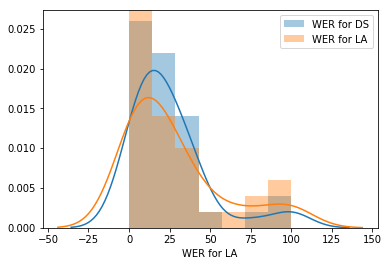

In [16]:
# Plotting the graph for v1
sns.distplot(wer_df["WER for DS"], label="WER for DS")
sns.distplot(wer_df["WER for LA"], label="WER for LA")
plt.legend()
plt.show()

### According to wer module
**For video 1, WER for LA is better by 8.36% <br />
  **

In [19]:
vdf

,Deepspeech hypothesis,Livai hypothesis,Reference
0,,one,i
1,i was just to,i was just,was just
2,on to somebody who some kind of an expert on t...,king to somebody who some kind of an expert on...,talking to somebody who's some kind of an expe...
3,dont get to see anything except to a bit of ne...,i don't get to see anything except bit of news...,don't get to see anything except a bit of nail...
4,all the time,lagta hai,all the time i
5,i never get to grow sorrow see any things is a...,i never get to brass or see anything i was ask...,never get to browse or see anything so i was a...
6,and he is saying it like as a matter of fact h...,and he is saying it like some matter of fact h...,and he's saying it like it's a matter of fact ...
7,it,saint,70 of
8,of the internet traffic is pornography i dont ...,of the internet traffic is pornography i don't...,the internet traffic is pornography i don't kn...
9,im in whats happened to us,i mean what happened to us,mean what's happened to us


In [17]:
wer_df


,WER for DS,WER for LA
1,75.000000,25.000000
2,25.925926,16.666667
3,14.062500,18.750000
4,14.285714,71.428571
5,26.666667,8.888889
6,33.333333,33.333333
7,100.000000,100.000000
8,21.621622,8.108108
9,15.384615,15.384615
10,0.909091,0.000000
